A **multilayer perceptron** (MLP) is a feedforward artificial neural network that generates a set of outputs from a set of inputs. An MLP is characterized by several layers of input nodes connected as a directed graph between the input and output layers. MLP uses backpropogation for training the network. MLP is a deep learning method.

Main goal is to implement a two-layer neural network for binary classification, train it using gradient descent and use it to classify the Iris dataset. Our model is
y^=σ(Wσ(Vx)) 
* where we have  M  hidden units and  D  input features -- that is  w∈RM , and  V∈RM×D . For simplicity here we do not include a bias parameter for each layer. Key to our implementation is the gradient calculation.

In [ ]:
# Import libraries 
import numpy as np
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

First, A python class is created to initialize nwtwork. Then, model is fit using logistic regression with optimizer as Gradient descent. Next, predict() function is used to outcomes using the model.

In [ ]:
logistic = lambda z: 1./ (1 + np.exp(-z))

# a Python class that setups and initializes our network.
class MLP:

     # M: Number of layers
    def __init__(self, M = 64):
        self.M = M

     # x: Holds our input layer, the data we give to the network
     # y: Holds our desired output, which we will use to train the network
     # yh: Holds the output that our network produces       
    def fit(self, x, y, optimizer):
        N,D = x.shape

        # define the gradient function
        def gradient(x, y, params):
            v, w = params
            z = logistic(np.dot(x, v))            #N x M
            yh = logistic(np.dot(z, w))           #N
            dy = yh - y                           #N
            dw = np.dot(z.T, dy)/N                #M
            dz = np.outer(dy, w)                  #N x M
            dv = np.dot(x.T, dz * z * (1 - z))/N  #D x M
            dparams = [dv, dw]
            return dparams
        
        w = np.random.randn(self.M) * .01
        v = np.random.randn(D,self.M) * .01
        params0 = [v,w]
        # run the optimizer to get the optimal weights
        self.params = optimizer.run(gradient, x, y, params0)
        return self
    
    def predict(self, x):
        v, w = self.params
        z = logistic(np.dot(x, v))                #N x M
        yh = logistic(np.dot(z, w))               #N
        return yh

The implementation above we have used a list data structure to maintain model parameters and their gradients. Below I have modified the GradientDescent class to also work with a list of parameters

In [ ]:
class GradientDescent:
    # Constructor to initialize the attributes of class 
    def __init__(self, learning_rate=.001, max_iters=1e4, epsilon=1e-8):
        
        # The self variable is used to represent the current instance of the class. learning_rate, max_iters and epsilon are the attributes of the class
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.epsilon = epsilon
        
    def run(self, gradient_fn, x, y, params):
        norms = np.array([np.inf])
        t = 1
        while np.any(norms > self.epsilon) and t < self.max_iters:
            grad = gradient_fn(x, y, params)
            for p in range(len(params)):
                params[p] -= self.learning_rate * grad[p]
            t += 1
            norms = np.array([np.linalg.norm(g) for g in grad])
        return params

Let's apply this to do binary classification with Iris flowers dataset. Below we run gradient descent for a large number of iterations and plot the decision boundary.

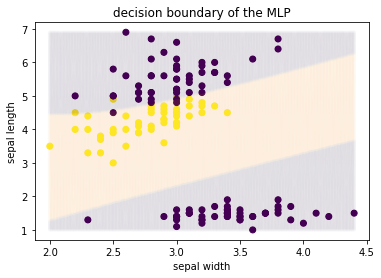

In [ ]:
from sklearn import datasets

# load the iris dataset from default available datasets
dataset = datasets.load_iris()
x, y = dataset['data'][:,[1,2]], dataset['target']
y =  y == 1

# 32 layers are used 
model = MLP(M=32)

# gradient descent is used as a optimizer with learning rate 0.1
optimizer = GradientDescent(learning_rate=.1, max_iters=20000)

yh = model.fit(x, y, optimizer).predict(x) 

# linspace function is used for creating numeric sequences
x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)

# meshgrid function is used to create a rectangular grid out of two given one-dimensional arrays representing the Cartesian indexing or Matrix indexing
x0,x1 = np.meshgrid(x0v, x1v)

# vstack() function is used to stack the sequence of input arrays vertically to make a single array.
x_all = np.vstack((x0.ravel(),x1.ravel())).T
yh_all = model.predict(x_all) > .5

# scatterplot is plotted for sepal length and sepal width
plt.scatter(x[:,0], x[:,1], c=y, marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=yh_all, marker='.', alpha=.01)

plt.ylabel('sepal length')
plt.xlabel('sepal width')
plt.title('decision boundary of the MLP')

plt.show()

**To conclude, In this tutorial binary classification is done on iris dataset. For Multilayer perceptron, 32 hidden layers are used and optimizer used is Gradient Descent.**